In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from scipy.signal import savgol_filter
from matplotlib.pyplot import figure
import seaborn as sns
import math 
%matpscipy.signal.residuez

UsageError: Line magic function `%matpscipy.signal.residuez` not found.


## Load data

In [38]:
data = pd.read_csv("../Data/test.txt") 
data.head()

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
0,-11,11,-20,-8,29,1,9,-21,-1,-37,...,38,64,-61,-33,-4,-19,-3,-30,-14,0
1,18,-23,2,-15,2,20,10,-31,-15,-15,...,-53,51,-42,40,3,92,-45,-40,24,0
2,2,-6,3,3,5,-14,10,-16,-6,-4,...,-6,-76,-41,-22,-12,17,15,62,-4,0
3,3,2,-9,4,6,-26,5,6,-6,14,...,-67,7,-11,15,41,-9,7,6,-1,0
4,1,-22,-15,9,-5,13,-5,-15,4,2,...,-7,127,-39,-24,116,-48,62,21,95,0


In [39]:
dataList = data.iloc[0]

## Choosing filter

In [40]:
dataList = abs(dataList[:100])

In [41]:
dataList.shape[0]


100

In [42]:
filteringData1 = savgol_filter(dataList,5,2)
filteringData2 = savgol_filter(dataList,7,2)
filteringData3 = savgol_filter(dataList,9,2)
filteringData4 = savgol_filter(dataList,11,2)

In [43]:
filteringData1.shape

(100,)

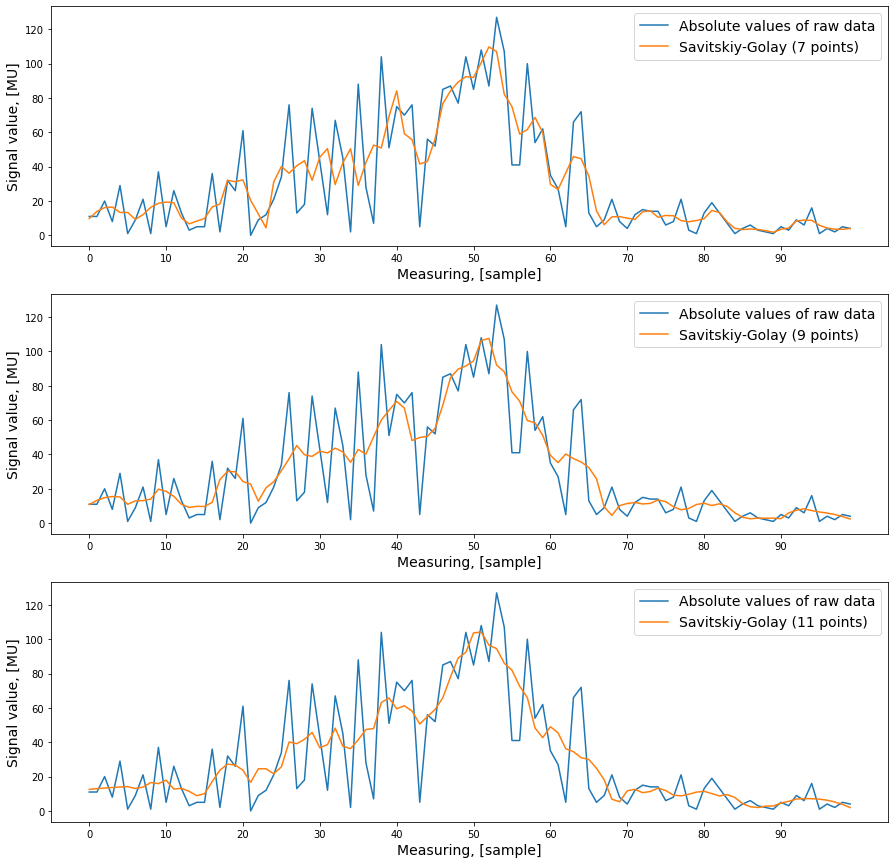

In [57]:
figure(figsize=(15, 15))

plt.xticks(np.arange(0, 100, 10))
plt.subplot(3,1,1)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData2,label='Savitskiy-Golay (7 points)')
plt.xticks(np.arange(0, 100, 10))
plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')

plt.subplot(3,1,2)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData3,label='Savitskiy-Golay (9 points)')
plt.xticks(np.arange(0, 100, 10))
plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')
plt.subplot(3,1,3)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData4,label='Savitskiy-Golay (11 points)')
plt.xticks(np.arange(0, 100, 10))
plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')



In [45]:
def sigmaValue(inp):
    length = inp.shape[0]
    sigma = 0
    for i in inp:
        sigma += i*i
    sigma /= length
    sigma = math.sqrt(sigma)
    return sigma

In [46]:
def meanValue(inp):
    mean = 0
    length = inp.shape[0]
    for i in inp:
        mean += i
    mean /= length
    return mean

In [47]:
def standartization(inp):
    mean = meanValue(inp)
    sigma = sigmaValue(inp)
    length = inp.shape[0]
    output = np.zeros(length)
    for i in range(length):
        output[i] = (inp[i] - mean)/sigma
    return output

In [48]:
def movingAverageFilter(inp,n):
    inp = abs(inp)
    length = inp.shape[0]
    output = np.zeros(length)
    for i in range(length):
        current = 0
        for j in range(n):
            ind = int(i-(n-1)/2+j)
            if ((ind>-1) and (ind<length)):
                 current += inp[ind]/n
        output[i] = current
    return output

In [49]:
maf3 = movingAverageFilter(dataList,3)
maf5 = movingAverageFilter(dataList,5)
maf7 = movingAverageFilter(dataList,7)

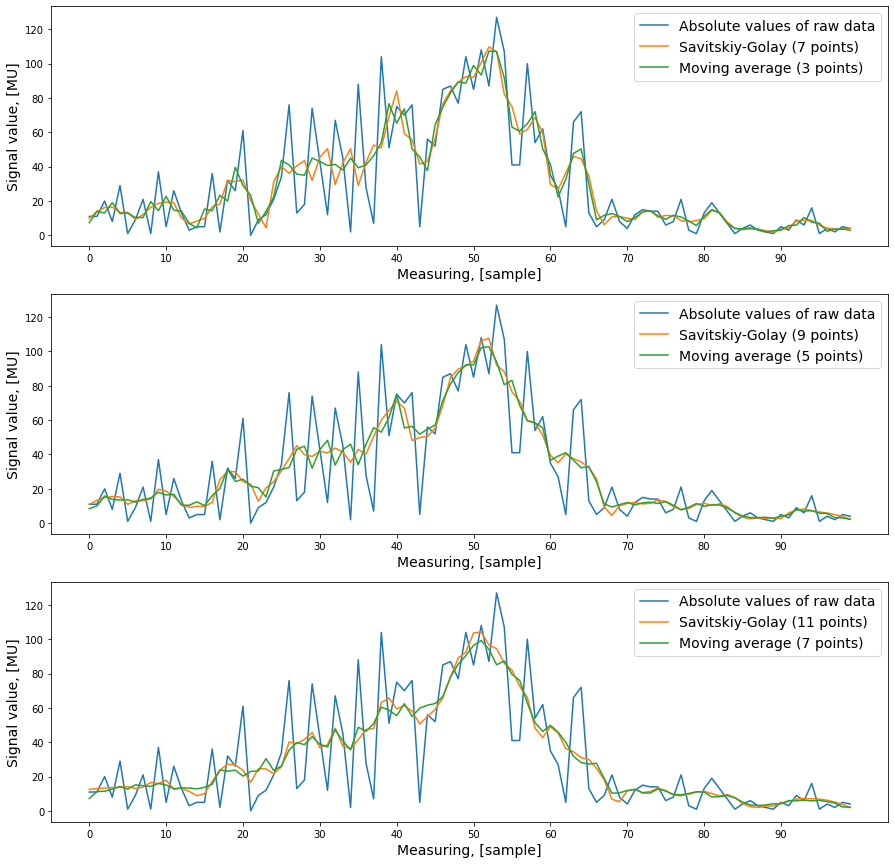

In [56]:
figure(figsize=(15, 15))

plt.subplot(3,1,1)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData2,label='Savitskiy-Golay (7 points)')
plt.plot(maf3,label='Moving average (3 points)')
plt.xticks(np.arange(0, 100, 10))

plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})
#plt.axis('off')
plt.subplot(3,1,2)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData3,label='Savitskiy-Golay (9 points)')
plt.plot(maf5,label='Moving average (5 points)')
plt.xticks(np.arange(0, 100, 10))

plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})
#plt.axis('off')

plt.subplot(3,1,3)
plt.plot(dataList,label='Absolute values of raw data')
plt.plot(filteringData4,label='Savitskiy-Golay (11 points)')
plt.plot(maf7,label='Moving average (7 points)')
plt.xticks(np.arange(0, 100, 10))

plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})
#plt.axis('off')


In [51]:
data1 = data.iloc[43]
data2 = data.iloc[24]
data3 = data.iloc[78]

In [52]:
filtered1 = movingAverageFilter(data1,5)
filtered2 = movingAverageFilter(data2,5)
filtered3 = movingAverageFilter(data3,5)
st = standartization(filtered1)

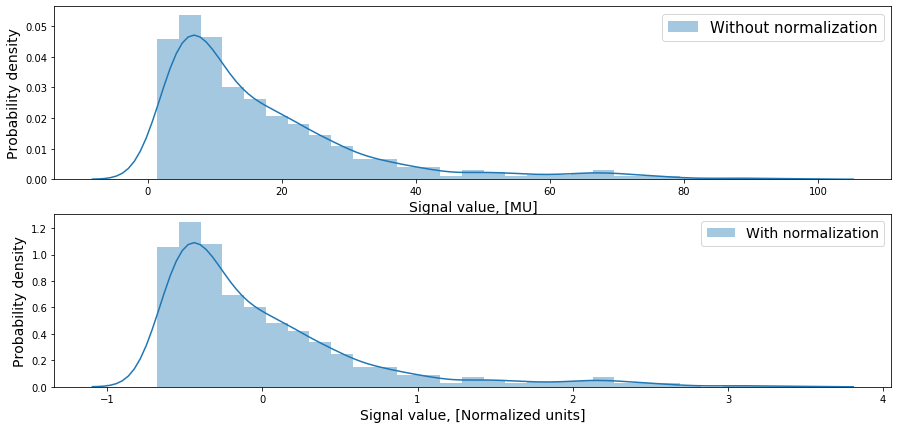

In [55]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
sns.distplot(filtered1,label = 'Without normalization');
plt.ylabel("Probability density",fontsize = 14)
plt.xlabel("Signal value, [MU]",fontsize = 14)
plt.legend(prop={'size': 15})
plt.subplot(2,1,2)
sns.distplot(st,label = 'With normalization');
plt.ylabel("Probability density",fontsize = 14)
plt.xlabel("Signal value, [Normalized units]",fontsize = 14)
plt.legend(prop={'size': 14})


In [24]:
std1 = standartization(filtered1)
std2 = standartization(filtered2)
std3 = standartization(filtered3)

(-40.0, 840.0, -0.9405195033872648, 3.5970740806746426)

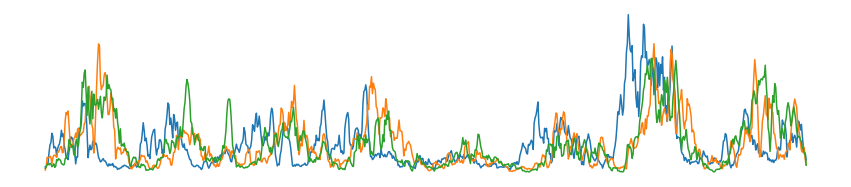

In [25]:
figure(figsize=(15, 7))

plt.subplot(2,1,1)
plt.plot(std1)
plt.plot(std2)
plt.plot(std3)
plt.axis('off')

In [26]:
example = np.array([np.random.randint(3,15, size=100),dataList,np.random.randint(3,15, size=100)]).reshape(300)
example = movingAverageFilter(example,5)
summ = np.zeros(300)
diff = np.zeros(300)
for i in range(300):
    if i>99:
        summ[i]= np.sum(example[i-100:i])
    else:
        summ[i]= np.sum(example[0:i])
for i in range(300):
    if i>0:
        diff[i] = summ[i]-summ[i-1]


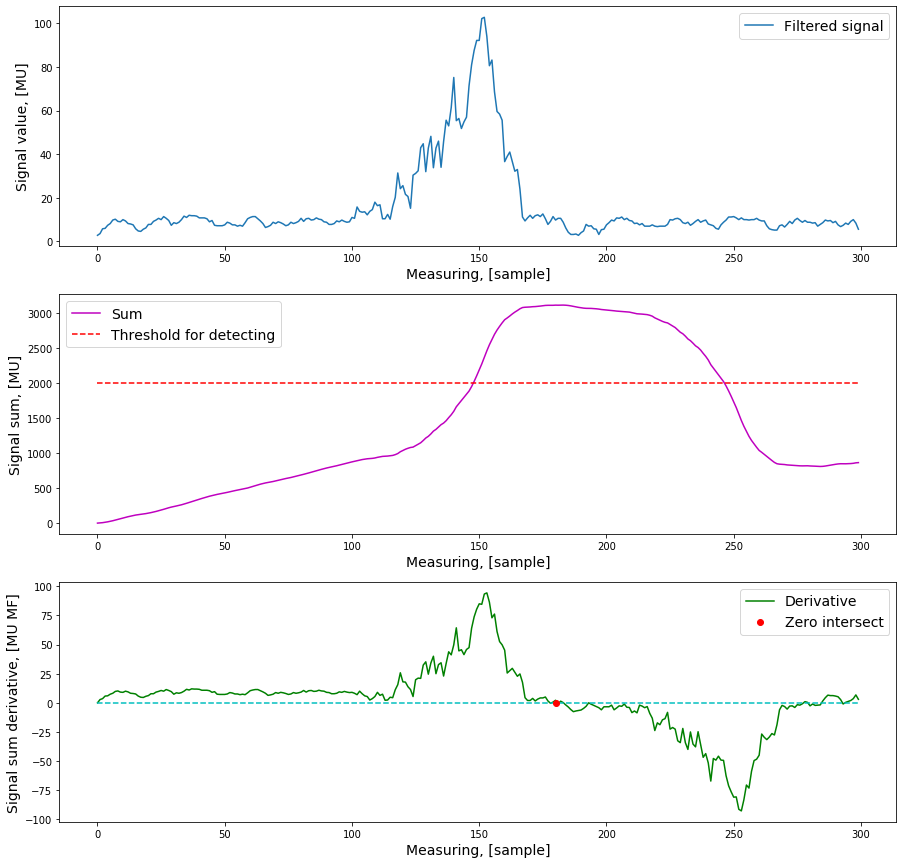

In [54]:
figure(figsize=(15, 15))


plt.subplot(3,1,1)
plt.plot(example,label='Filtered signal')
plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')


plt.subplot(3,1,2)
plt.plot(summ,label='Sum',color = 'm')
plt.plot(np.zeros(300)+2000,'--',color = 'r',label='Threshold for detecting')
plt.ylabel("Signal sum, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')
plt.subplot(3,1,3)
plt.plot(diff,label='Derivative',color = 'g')
plt.plot(np.zeros(300),'--',color = 'c')
plt.plot(180, 0, 'o',label='Zero intersect',color = 'r')
plt.ylabel("Signal sum derivative, [MU MF]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)
plt.legend(prop={'size': 14})

#plt.axis('off')

In [59]:
historyarduino4new = pd.read_csv("historyarduino4new.csv")
historyarduino4old = pd.read_csv("historyarduino4old.csv")
historyarduino7 = pd.read_csv("historyarduino7.csv")
historyPCbig = pd.read_csv("historyPCbig.csv")
historyPCsmall = pd.read_csv("historyPCsmall.csv")

## PCbig

Text(0.5, 0, 'Training duration, [epochs]')

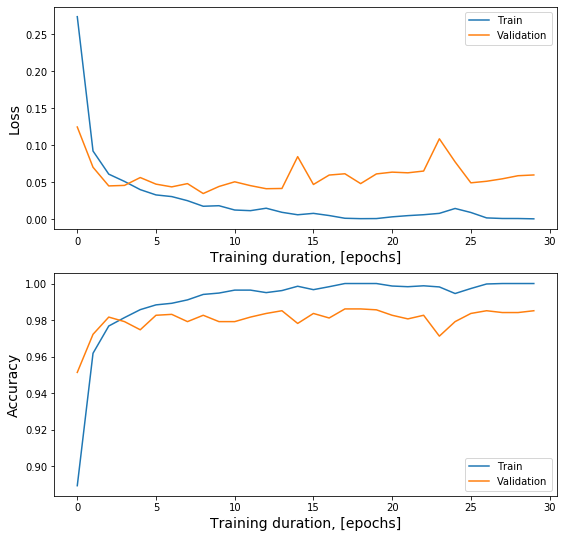

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(historyPCbig['loss'])
plt.plot(historyPCbig['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)
plt.subplot(2,1,2)
plt.plot(historyPCbig['accuracy'])
plt.plot(historyPCbig['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)

## PCsmall

Text(0.5, 0, 'Training duration, [epochs]')

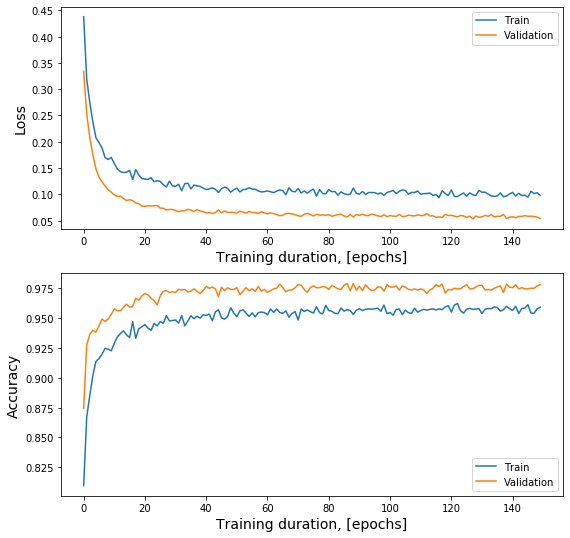

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(historyPCsmall['loss'])
plt.plot(historyPCsmall['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)
plt.subplot(2,1,2)
plt.plot(historyPCsmall['accuracy'])
plt.plot(historyPCsmall['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)

## Arduino4

Text(0.5, 0, 'Training duration, [epochs]')

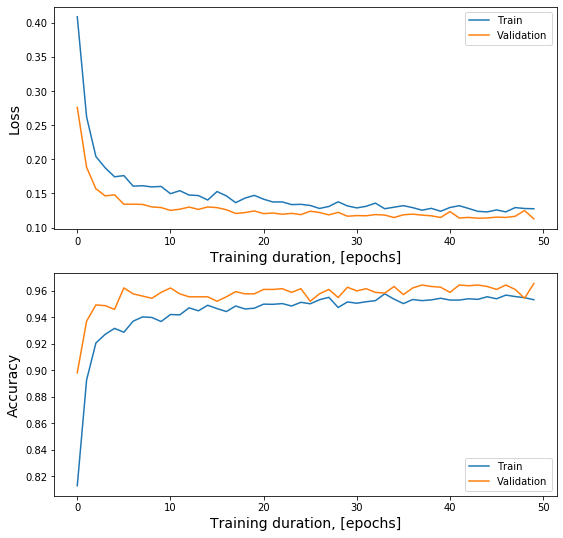

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(historyarduino4new['loss'])
plt.plot(historyarduino4new['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)
plt.subplot(2,1,2)
plt.plot(historyarduino4new['accuracy'])
plt.plot(historyarduino4new['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)

## Arduino7

Text(0.5, 0, 'Training duration, [epochs]')

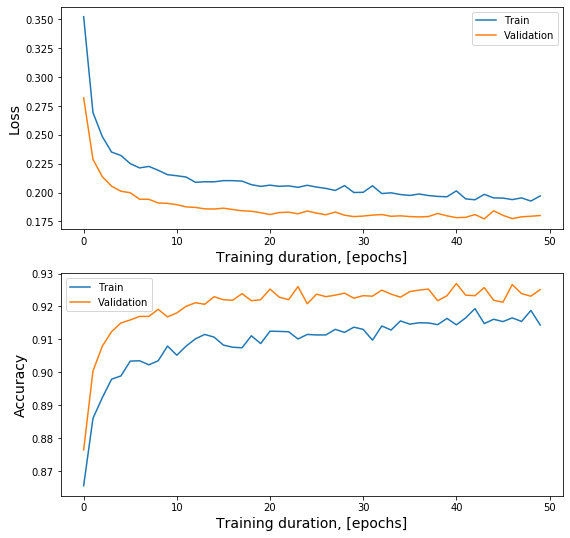

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(historyarduino7['loss'])
plt.plot(historyarduino7['val_loss'])
plt.legend(["Train","Validation"])
plt.ylabel("Loss",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)
plt.subplot(2,1,2)
plt.plot(historyarduino7['accuracy'])
plt.plot(historyarduino7['val_accuracy'])
plt.legend(["Train","Validation"])
plt.ylabel("Accuracy",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)

Text(0.5, 0, 'Training duration, [epochs]')

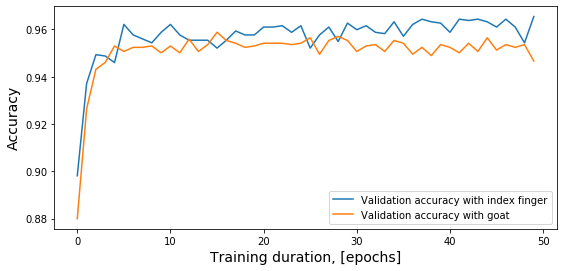

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(historyarduino4new['val_accuracy'])
plt.plot(historyarduino4old['val_accuracy'])
plt.legend(["Validation accuracy with index finger","Validation accuracy with goat"])
plt.ylabel("Accuracy",fontsize = 14)
plt.xlabel("Training duration, [epochs]",fontsize = 14)

In [2]:
data = pd.read_csv("../Data/test0.txt") 
data.head()

,17,-12,-2,-5,-6,-2.1,4,-3,0
0,17,-2,-3,-7,-14,-6,-20,3,0
1,3,3,-1,2,-6,-8,5,0,0
2,0,2,-2,2,12,5,3,-2,0
3,-1,4,0,-3,-2,-3,0,1,0
4,11,31,1,-1,3,-7,0,8,0


Text(0.5, 0, 'Measuring, [sample]')

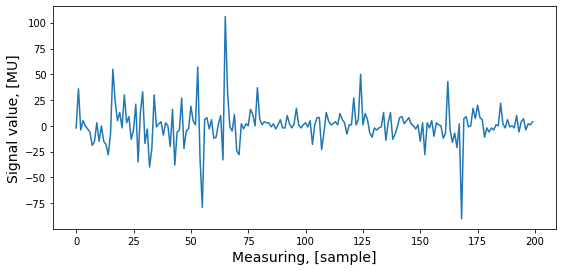

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
plt.subplot(2,1,1)
plt.plot(data['17'][0:200])
plt.ylabel("Signal value, [MU]",fontsize = 14)
plt.xlabel("Measuring, [sample]",fontsize = 14)